In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

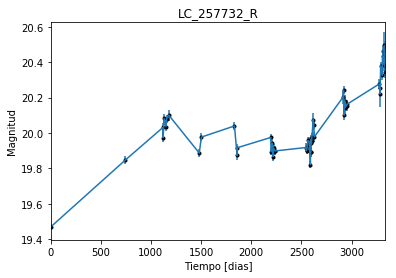

In [2]:
data = np.genfromtxt('LC_257732_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_257732_R')
plt.savefig("LC_257732_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

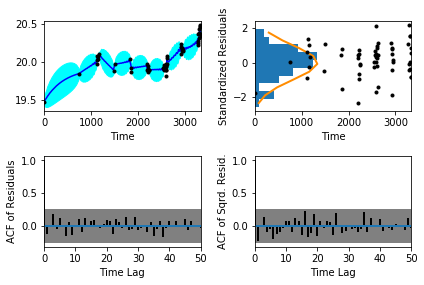

In [5]:
sample.assess_fit()

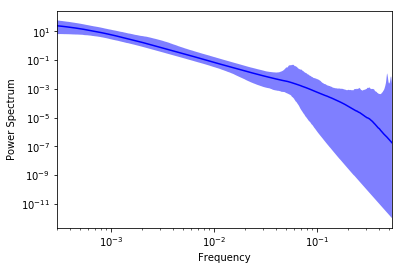

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [6]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

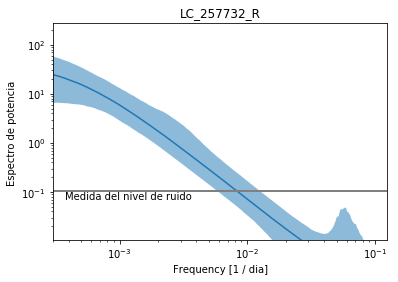

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_257732_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_257732_R')

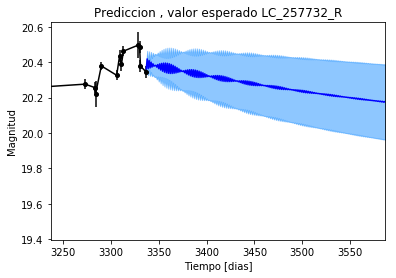

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_257732_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_257732_R')

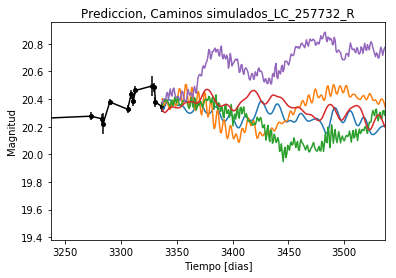

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_257732_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


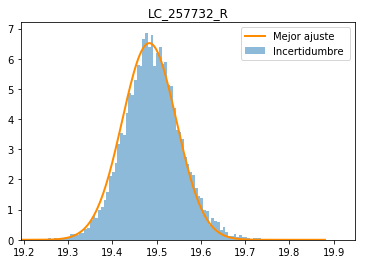

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_257732_R')
plt.savefig("Mejor_ajuste_LC_257732_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_257732_R')

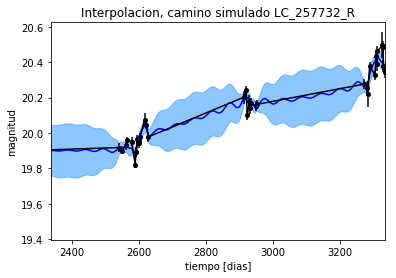

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_R')

Text(0.5,1,'Interpolacion, camino simulado LC_257732_R')

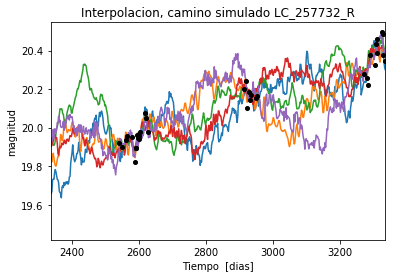

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 480.1292777
Median: 0.0108911345435
Standard deviation: 0.114032848468
68% credibility interval: [ 0.00227429  0.05972321]
95% credibility interval: [ 0.00047064  0.38658822]
99% credibility interval: [  3.32380844e-04   8.18736779e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 357.023135338
Median: 0.0104240478241
Standard deviation: 0.0906555943884
68% credibility interval: [ 0.00215282  0.05262989]
95% credibility interval: [ 0.00044568  0.26894197]
99% credibility interval: [  3.32380844e-04   6.64434349e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 339.979104301
Median: 0.209620328993
Standard deviation: 0.2

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 391.829922315
Median: 95.8545826767
Standard deviation: 2.1374581855
68% credibility interval: [ 93.59108754  97.53845962]
95% credibility interval: [ 90.52849539  98.95158108]
99% credibility interval: [ 88.05229858  99.47638764]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 747.571701777
Median: 1.73748457852
Standard deviation: 2.27078341222
68% credibility interval: [ 0.44543737  4.82477855]
95% credibility interval: [ 0.06766607  7.77918003]
99% credibility interval: [  0.02300857  11.68428422]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 761.613964387
Median: 3.73971616512
Standard deviation: 11.9913367069
68% credibility interval: [  0.26499382  16.82527524]
95% credibility interval: [  0.11244946 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11309.0540228
Median: 7.90229987685e-20
Standard deviation: 2.57131965712e+23
68% credibility interval: [  1.45699593e-58   1.41523473e-06]
95% credibility interval: [  9.55410981e-88   8.39063209e+00]
99% credibility interval: [  4.46252558e-98   1.89771466e+15]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1256.85595249
Median: 19.9423527444
Standard deviation: 0.109625194562
68% credibility interval: [ 19.83988477  20.04547845]
95% credibility interval: [ 19.71653914  20.15508147]
99% credibility interval: [ 19.61310245  20.24959792]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 604.719705309
Median: 0.230194806507
Standard deviation: 0.273775560203
68% credibility interval: [ 0.06055976  0.58031757]
95% credibility interval: [ 0.          0.96401532]
99% credibility interval: [ 0.          1.04844932]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 604.719705309
Median: 0.230194806507
Standard deviation: 0.273775560203
68% credibility interval: [ 0.06055976  0.58031757]
95% credibility interval: [ 0.          0.96401532]
99% credibility interval: [ 0.          1.04844932]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 781.646340944
Median: 0.0
Standard deviation: 0.000377278387196
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 391.829922315
Median: 95.8545826767
Standard deviation: 2.1374581855
68% credibility interval: [ 93.59108754  97.53845962]
95% credibility interval: [ 90.52849539  98.95158108]
99% credibility interval: [ 88.05229858  99.47638764]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1259.59270427
Median: 0.0519773026261
Standard deviation: 0.0236989665937
68% credibility interval: [ 0.03689756  0.07689203]
95% credibility interval: [ 0.02702213  0.11636338]
99% credibility interval: [ 0.02208534  0.155072  ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 727.30448697
Median: 1.11164606686
Standard deviation: 0.234344449976
68% credibility interval: [ 0.90842874  1.37052   ]
95% credibility interval: [ 0.76647268  1.68517049]
99% credibility interval: [ 0.69326032  1.87451358]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 252.117089948
Median: 0.0439345433937
Standard deviation: 0.576330486432
68% credibility interval: [ 0.00139559  0.47574129]
95% credibility interval: [  7.10255184e-05   1.92463532e+00]
99% credibility interval: [  2.37330196e-17   3.77243693e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 480.1292777
Median: (-0.0684310165425-3.47838100439j)
Standard deviation: 1.86343374682
68% credibility interval: [-0.37525200-1.2152062j  -0.01428981-0.95606772j]
95% credibility interval: [-2.42900545-2.63163803j -0.00295712-0.45790839j]
99% credibility interval: [ -5.14427490e+00-0.03134502j  -2.08841044e-03-0.33662679j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 357.023135338
Median: (-0.0654962241295+0.467663597235j)
Standard deviation: 1.81203724552
68% credibility interval: [-0.33068336+2.56360999j -0.01352656+0.83599148j]
95% credibility interval: [-1.68981224+4.44683287j -0.00280027+0.32123506j]
99% credibility interval: [ -4.17476414e+00+1.23163902j  -2.08841044e-03+0.33662679j]
Posterior summary for par